In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
img=cv2.imread('/kaggle/input/page-opencv/IMG_6261.jpg')#page-opencv
plt.imshow(img)
plt.show()

STEPWISE

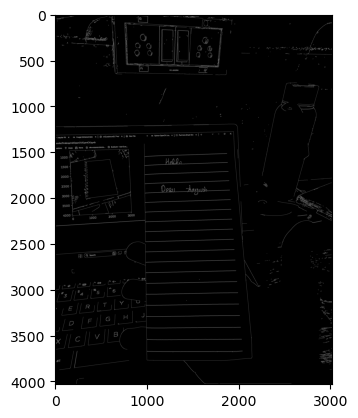

In [152]:
img=cv2.imread('/kaggle/input/pages-opencv/IMG_6264.jpg')
edges = cv2.Canny(img,100,200)
plt.imshow(edges,cmap = 'gray')


In [277]:
img=cv2.imread('/kaggle/input/kaggletest/IMG-5441.jpg')
img1 = cv2.convertScaleAbs(img,alpha=2,beta=-150)
gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
kernel = np.ones((5, 5), np.uint8)

#closing = cv2.morphologyEx(gray, cv2.MORPH_CLOSE, kernel,iterations=50)
ret2,th3 = cv2.threshold(gray,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
eroded_image = cv2.erode(th3, kernel, iterations=1)
closed_image = cv2.morphologyEx(eroded_image, cv2.MORPH_CLOSE, kernel,th3, iterations=5)
#_,th3 = cv2.threshold(closing,250,255,0)
#th3 = cv2.adaptiveThreshold(closing,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,11,2)
#th3 = cv2.adaptiveThreshold(blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)

contours, hierarchy = cv2.findContours(closed_image,cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

largest_contour = max(contours, key=cv2.contourArea)



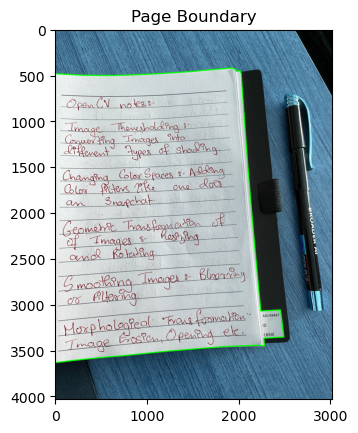

In [278]:
draw=cv2.drawContours(img, [largest_contour], -1, (0, 255, 0), 12)

plt.imshow(draw ) 
plt.title('Page Boundary')

plt.show()

In [279]:
c=largest_contour
p=cv2.arcLength(c,True)
approx= cv2.approxPolyDP(c,0.04*p,True)

approx

array([[[2012,  456]],

       [[   0,  487]],

       [[   0, 3636]],

       [[2488, 3357]]], dtype=int32)

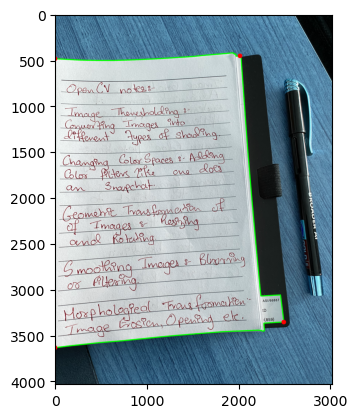

In [280]:
for i in range(4):
    cv2.circle(img,approx[i][0],25,(255,0,0),-1)
plt.imshow(img)

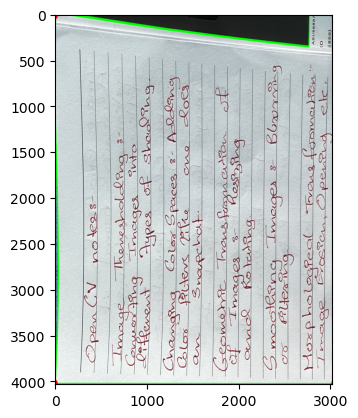

In [281]:
arr=np.array([approx[i][0] for i in range(4)], dtype=np.float32)#,approx[1][0],approx[2][0],approx[3][0]]
height,width=img.shape[:2]
pts=np.float32([[0,0],[0,height-1],[width-1,height-1],[width-1,0]]) 
op=cv2.getPerspectiveTransform(arr,pts)
dst=cv2.warpPerspective(img,op,(width,height))
plt.imshow(dst, cmap = 'gray')